In [7]:
import sys
import numpy as np
import sounddevice as sd


sys.path.append("/Users/carlosedm10/projects/college/TDS")

from utils import continuous_time_plot, discrete_time_plot
from scipy.io import wavfile


# Path to the .wav files
audio_A1 = "/Users/carlosedm10/projects/college/TDS/P1/Practicas_Practica1_sound1.wav"
audio_SH = "/Users/carlosedm10/projects/college/TDS/P1/Practicas_Practica1_sound2.wav"
audio_MM = "/Users/carlosedm10/projects/college/TDS/P1/Practicas_Practica1_sound3.wav"
audio_A2 = "/Users/carlosedm10/projects/college/TDS/P1/Practicas_Practica1_sound4.wav"
audio_TAP = "/Users/carlosedm10/projects/college/TDS/P1/Practicas_Practica1_sound5.wav"

audios = [audio_A1, audio_SH, audio_MM, audio_A2, audio_TAP]


# Exercise 1

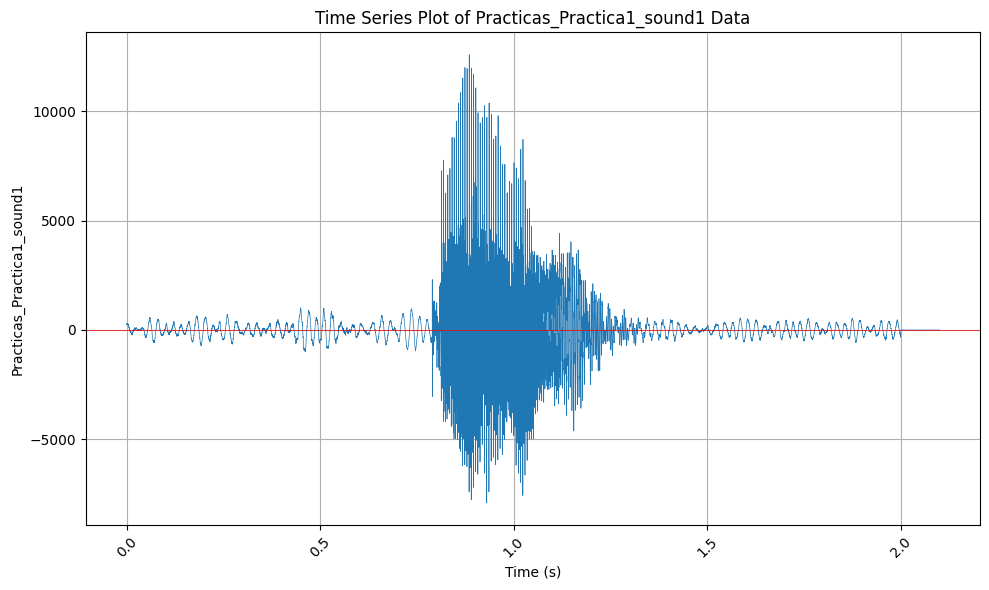

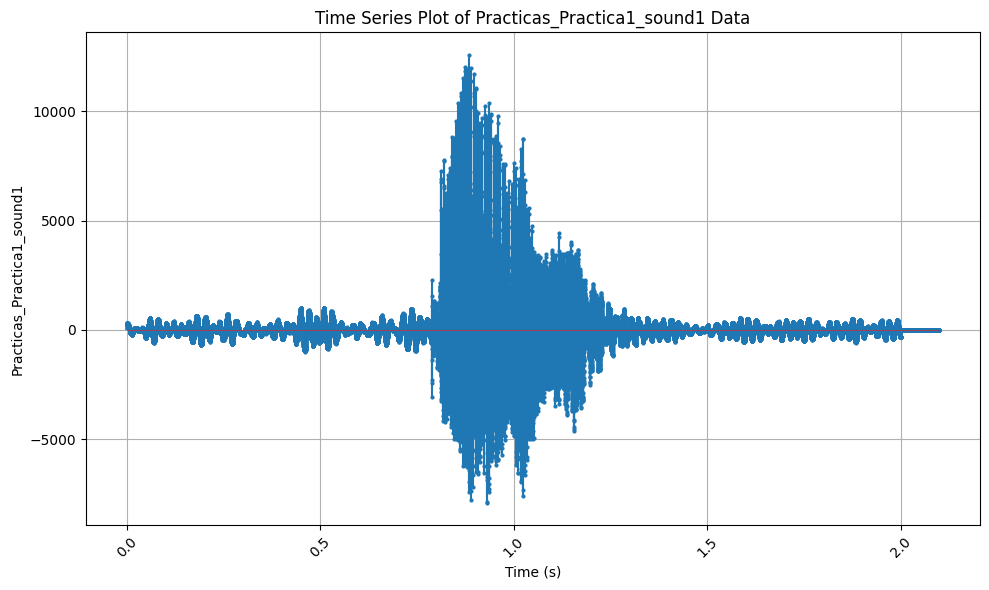

||PaMacCore (AUHAL)|| Warning on line 521: err=''!obj'', msg=Unknown Error
||PaMacCore (AUHAL)|| Warning on line 441: err=''!obj'', msg=Unknown Error
||PaMacCore (AUHAL)|| Error on line 1332: err='-10851', msg=Audio Unit: Invalid Property Value


PortAudioError: Error opening OutputStream: Internal PortAudio error [PaErrorCode -9986]

In [8]:

for audio in audios:
    freq, audio_data = wavfile.read(audio)
    time_vector = np.arange(len(audio_data)) / freq

    # Plot the audio data
    continuous_time_plot(
        time_vector,
        audio_data,
        variable_name=audio.split("/")[-1].split(".")[0],
        xlabel="Time (s)",
        linewidth=0.5,
    )
    discrete_time_plot(
        time_vector,
        audio_data,
        variable_name=audio.split("/")[-1].split(".")[0],
        xlabel="Time (s)",
        markersize=2,
        linewidth=0.5,
    )
    # Play the audio
    sd.play(audio_data, freq)

    # Wait for the audio to finish playing
    sd.wait()

# Exercise 2

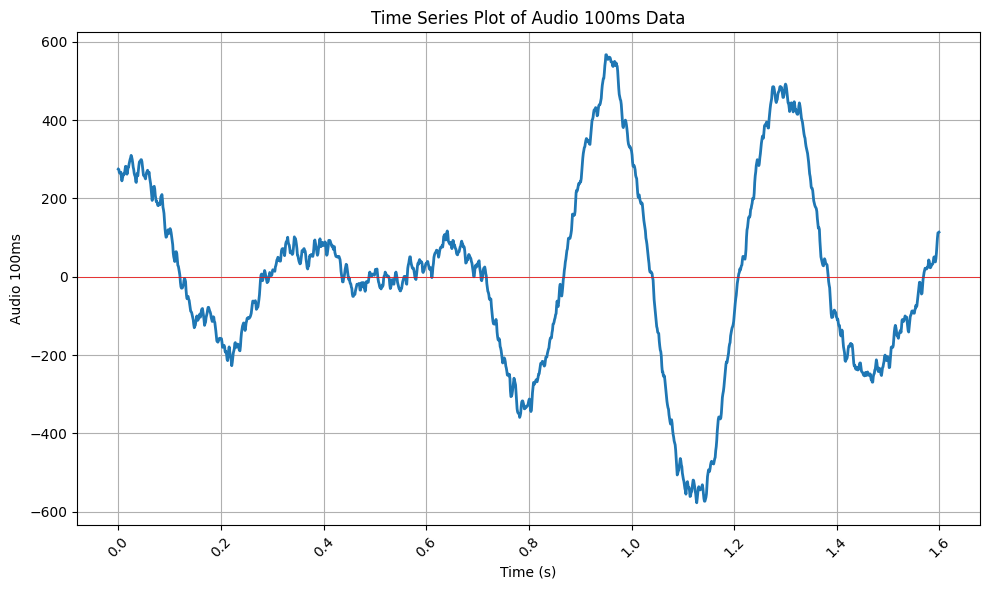

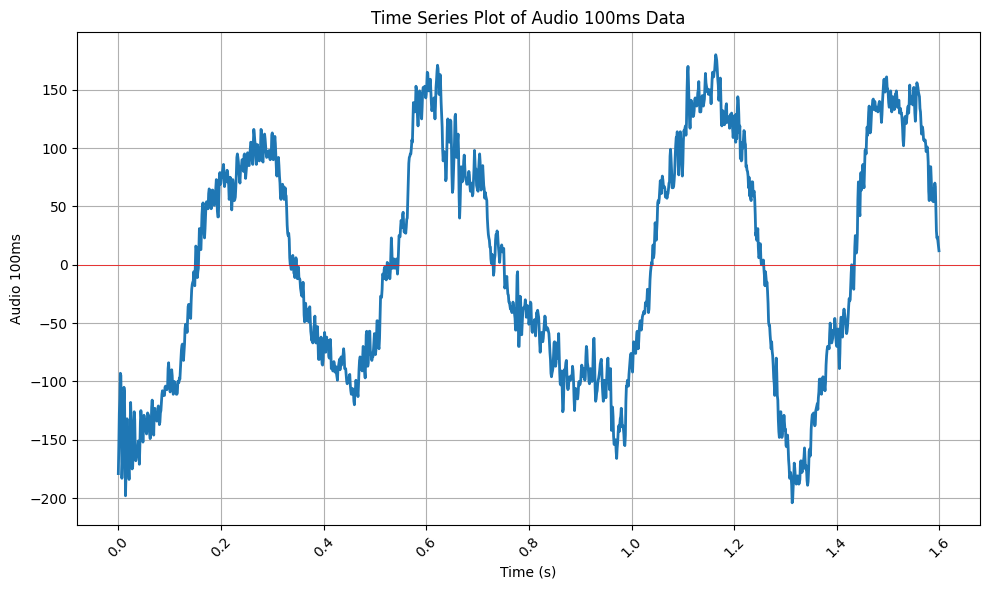

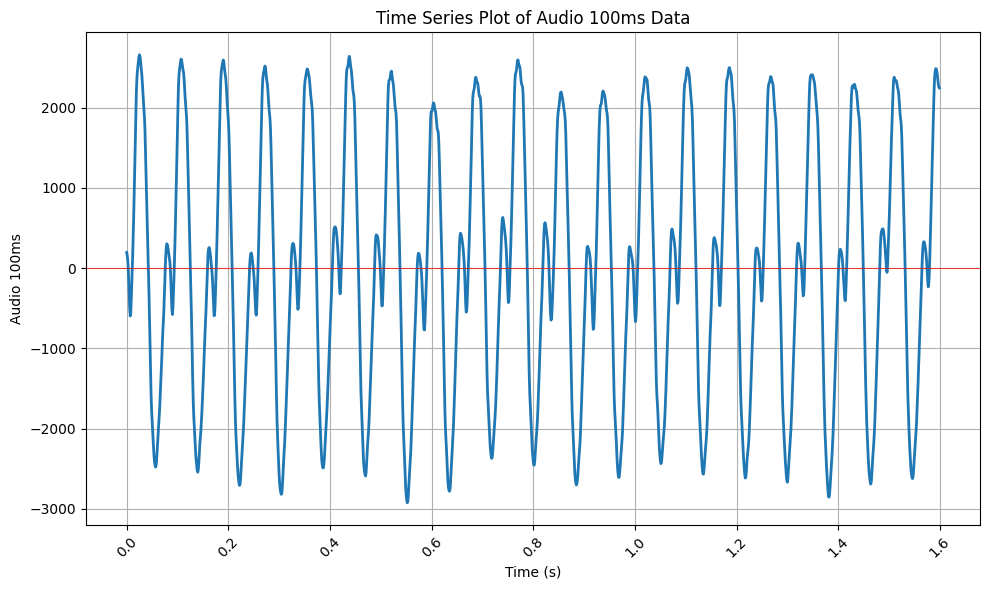

In [17]:
for i in range(3):
    freq, y = wavfile.read(audios[i])
    time_scale= int(freq * 0.1)
    time_vector= np.arange(time_scale) / 1000
    audio_100ms = y[:time_scale]
    continuous_time_plot(time_vector,audio_100ms, variable_name="Audio 100ms", xlabel="Time (s)")

    # discrete_time_plot(
    #   audio_100ms, variable_name="Audio 100ms", xlabel="Time (ms)"
    # )